In [19]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches
from itertools import product

### 1 task
В таблице представлены результаты эксперимента, направленного на проверку гипотезы о взаимосвязи двух номинативных переменных с двумя градациями. Рассчитайте ожидаемые частоты для проверки нулевой гипотезы о независимости двух переменных X и Y.
Image: https://ucarecdn.com/f5fdc068-01a7-4533-b9b2-fe3ed07de382/

В поле для ответа напишите максимальное значение из четырех ожидаемых частот.

https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.chi2_contingency.html

In [20]:
observed = ([10,6], [5,15])

chi2_contingency(observed)

(3.715714285714286,
 0.053902557169387154,
 1,
 array([[ 6.66666667,  9.33333333],
        [ 8.33333333, 11.66666667]]))

В таблице сопряженности два на два значения ожидаемых частот могут быть равны друг другу. 

При проверке гипотезы о взаимосвязи двух номинативных переменных мы можем принять альтернативную гипотезу если в таблице есть значимые отклонения между наблюдаемыми и ожидаемыми значениями хотя бы в некоторых ячейках

In [5]:
# с поправкой

observed_array = [ [15, 9], [11, 6] ]
chi2_value, p_value, df_value, expected_array = chi2_contingency(observed_array, correction=True) 
# 'correction=True' - поправка Йейтса
print(f'Хи-квадрат = {chi2_value:.3f}, p-value = {p_value:.3f}, df = {df_value}')
print(f'Ожидаемые значения:\n{expected_array}')

Хи-квадрат = 0.000, p-value = 1.000, df = 1
Ожидаемые значения:
[[15.2195122  8.7804878]
 [10.7804878  6.2195122]]


In [7]:
# без поправки

chi2_value, p_value, df_value, expected_array = chi2_contingency(observed_array, correction=False) 
print(f'Хи-квадрат = {chi2_value:.3f}, p-value = {p_value:.3f}, df = {df_value}')
print(f'Ожидаемые значения:\n{expected_array}')

Хи-квадрат = 0.021, p-value = 0.885, df = 1
Ожидаемые значения:
[[15.2195122  8.7804878]
 [10.7804878  6.2195122]]


### 2 task
Перед знаком стоп некоторые водители останавливаются полностью, другие лишь сбавляют скорость, но некоторые не останавливаются вообще. Важнейший вопрос, есть ли взаимосвязь между полом и стилем вождения автомобиля!  Ниже представлена таблица сопряженности данных исследования, посвященного этому вопросу.
https://ucarecdn.com/fd5dfb7a-4de4-4e78-bfb1-c3fb2a5943e0/

In [8]:
chi2, p_value, dof, ev = chi2_contingency(([20,15],[11,12],[7,9]))
print(f'''
Хи квадрат {chi2}
p - value {p_value}
Степеней свобод {dof}
Ожидаемые наблюдения
{ev}
''')


Хи квадрат 0.9544070774762996
p - value 0.6205162173513055
Степеней свобод 2
Ожидаемые наблюдения
[[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]



При проверке гипотезы о взаимосвязи двух номинативных переменных с двумя градациями (таблица сопряженности два на два), если на самом деле верна нулевая гипотеза и никакой взаимосвязи между переменными в генеральной совокупности нет, то справедливы следующие утверждения:
- Число степеней свободы будет равняться одному
- Распределение статистики хи-квадрат будет обладать значительной асимметрией

x-squared = 5.57719298245614
p-value = 0.018195864430772903
df = 1


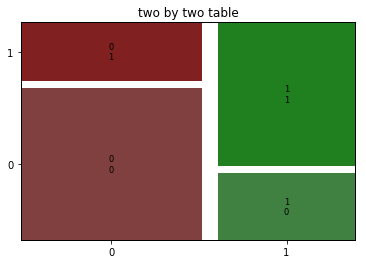

In [12]:
# Плацебо 18-7, Аспирин 6-13 (есть и нет тромбоза)

observed = np.array([[18, 7], [6, 13]])

chi2, p, df, expected = chi2_contingency(observed)

print('x-squared =', chi2)
print('p-value =', p)
print('df =', df)

mosaic(observed, gap=0.05, title='two by two table')
plt.show()

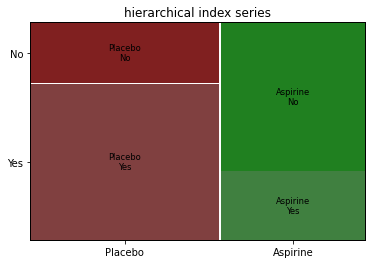

In [13]:
tuples = list(product(['Placebo', 'Aspirine'], ['Yes', 'No']))
index = pd.MultiIndex.from_tuples(tuples)
data = pd.Series([18,7,6,13], index=index)
mosaic(data, title='hierarchical index series')
plt.show()

In [18]:
# через функцию

def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))

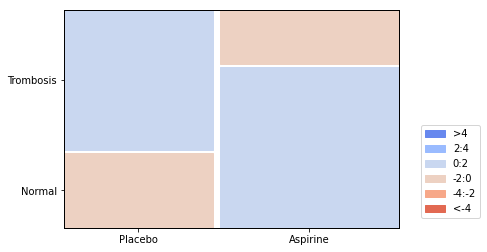

In [16]:
cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([7, 13, 18, 6], index=idx)
make_me_plot(data)

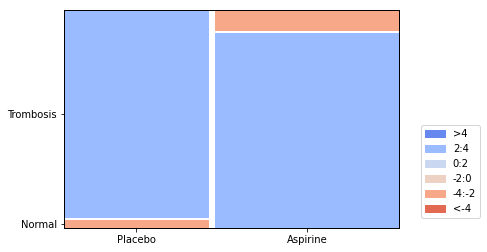

In [17]:
cure = ['Placebo', 'Aspirine']
effect = ['Normal', 'Trombosis']
idx = pd.MultiIndex.from_tuples(product(cure, effect))
data = pd.Series([1, 25, 30, 3], index=idx)
make_me_plot(data)

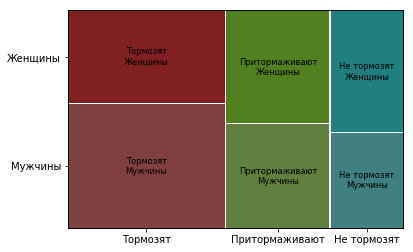

In [21]:
tab = pd.DataFrame({
    'Мужчины': [20, 11, 7],
    'Женщины': [15, 12, 9]
})

tab.index = ('Тормозят', 'Притормаживают', 'Не тормозят')

mosaic(tab.stack())
plt.show()

### 3 task
Обратимся к данным о катастрофе «Титаника». На графике представлена взаимосвязь пола пассажира «Титаника» и того, выжил он или нет в катастрофе. Размеры прямоугольников отвечают за пропорции наблюдений в той или иной ячейке, а цвет прямоугольников — за значение стандартизованного остатка в ячейках. Какие выводы мы можем сделать, проанализировав данный график?

https://ucarecdn.com/d0136831-807d-46d8-838a-fc76529721ee/

- Есть все основания отклонить нулевую гипотезу об отсутствии взаимосвязи пола и вероятности выжить в катастрофе.
- На борту Титаника большинство пассажиров - мужчины.
- Значимые отклонения между наблюдаемыми и ожидаемыми результатами получены во всех ячейках, что позволяет говорить: мужчины вероятнее погибнут, чем выживут, а женщины — наоборот.

### 4 task
А теперь изучим данные о взаимосвязи шанса выжить в кораблекрушении «Титаника» и класса билета пассажира. В данном случае график стандартизированных остатков построен по результатам таблицы сопряженности 3 на 2.

Какие выводы мы можем сделать в данном случае?
https://ucarecdn.com/df988820-a349-42d1-b224-81e98dace7cb/

- Пассажиры из третьего класса чаще погибали в катастрофе, чем пассажиры второго класса.
- Для пассажира с билетом первого класса вероятность выжить выше вероятности погибнуть.
- Наши данные не позволяют нам сделать вывод о статистически значимом различии в вероятности выжить или погибнуть у пассажиров второго класса.